In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-04 23:53:38.476773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='APPLE'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock,period="60d", interval="5m")
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-02-08 09:30:00-05:00,189.149994,189.535004,188.770004,188.899994,188.899994,1680127,APPLE
2024-02-08 09:35:00-05:00,188.899994,189.529999,188.889999,189.218994,189.218994,700986,APPLE
2024-02-08 09:40:00-05:00,189.214996,189.279999,188.809998,188.960007,188.960007,761154,APPLE
2024-02-08 09:45:00-05:00,188.994995,189.130005,188.940002,189.018402,189.018402,658508,APPLE
2024-02-08 09:50:00-05:00,189.020004,189.029999,188.699997,188.759995,188.759995,799515,APPLE
...,...,...,...,...,...,...,...
2024-05-03 15:35:00-04:00,164.100006,164.397903,164.070007,164.259995,164.259995,50136,GENERAL_ELC
2024-05-03 15:40:00-04:00,164.270004,164.350006,164.244995,164.259995,164.259995,43777,GENERAL_ELC
2024-05-03 15:45:00-04:00,164.259995,164.339996,164.149994,164.184998,164.184998,68900,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-02-08 09:30:00-05:00,189.149994,189.535004,188.770004,188.899994,188.899994,1680127,APPLE
1,2024-02-08 09:35:00-05:00,188.899994,189.529999,188.889999,189.218994,189.218994,700986,APPLE
2,2024-02-08 09:40:00-05:00,189.214996,189.279999,188.809998,188.960007,188.960007,761154,APPLE
3,2024-02-08 09:45:00-05:00,188.994995,189.130005,188.940002,189.018402,189.018402,658508,APPLE
4,2024-02-08 09:50:00-05:00,189.020004,189.029999,188.699997,188.759995,188.759995,799515,APPLE
...,...,...,...,...,...,...,...,...
46733,2024-05-03 15:35:00-04:00,164.100006,164.397903,164.070007,164.259995,164.259995,50136,GENERAL_ELC
46734,2024-05-03 15:40:00-04:00,164.270004,164.350006,164.244995,164.259995,164.259995,43777,GENERAL_ELC
46735,2024-05-03 15:45:00-04:00,164.259995,164.339996,164.149994,164.184998,164.184998,68900,GENERAL_ELC
46736,2024-05-03 15:50:00-04:00,164.190002,164.335007,164.029999,164.050003,164.050003,94979,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-02-08 09:30:00-05:00,146.970001,147.610001,146.929993,147.229996,147.229996,1238337,GOOGLE
2024-02-08 09:35:00-05:00,147.220001,147.490005,147.190002,147.419998,147.419998,248954,GOOGLE
2024-02-08 09:40:00-05:00,147.380005,147.565002,147.210007,147.289993,147.289993,358029,GOOGLE
2024-02-08 09:45:00-05:00,147.309998,147.479996,147.149994,147.259995,147.259995,286217,GOOGLE
2024-02-08 09:50:00-05:00,147.270004,147.300003,146.720001,146.745697,146.745697,293976,GOOGLE
...,...,...,...,...,...,...,...
2024-05-03 15:35:00-04:00,164.100006,164.397903,164.070007,164.259995,164.259995,50136,GENERAL_ELC
2024-05-03 15:40:00-04:00,164.270004,164.350006,164.244995,164.259995,164.259995,43777,GENERAL_ELC
2024-05-03 15:45:00-04:00,164.259995,164.339996,164.149994,164.184998,164.184998,68900,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2024-02-08 09:30:00-05:00,147.229996
2024-02-08 09:35:00-05:00,147.419998
2024-02-08 09:40:00-05:00,147.289993
2024-02-08 09:45:00-05:00,147.259995
2024-02-08 09:50:00-05:00,146.745697
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

39963

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.57971856],
       [-0.57910601],
       [-0.57952513],
       ...,
       [-0.52505762],
       [-0.52549283],
       [-0.5253639 ]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
#x_train

In [20]:
y_train

[-0.581491703589745,
 -0.5812337870789073,
 -0.5809616539227076,
 -0.5811209393818136,
 -0.5808308017543253,
 -0.5806373274767886,
 -0.5806663510780463,
 -0.5804922586630445,
 -0.5805567500888901,
 -0.5802666124614018,
 -0.5800892733384626,
 -0.580008695950564,
 -0.580057052221812,
 -0.5800409170672145,
 -0.5800892733384626,
 -0.5799442045247185,
 -0.580008695950564,
 -0.5797830005563769,
 -0.577077558186256,
 -0.5769460173222505,
 -0.5768009485085064,
 -0.5772683760663894,
 -0.5770104595555516,
 -0.5755436362635127,
 -0.5761077763638918,
 -0.5763656928747295,
 -0.5761438836915581,
 -0.575237363481427,
 -0.5746731741885034,
 -0.5742056974380758,
 -0.5742379677472709,
 -0.5740444934697342,
 -0.5733675056722616,
 -0.5728194515339355,
 -0.5719809154203097,
 -0.5716265815222428,
 -0.5713686650114052,
 -0.5714654267464456,
 -0.5713625651358865,
 -0.5713686650114052,
 -0.5714654267464456,
 -0.5715298689797468,
 -0.5712719524689089,
 -0.5711913750810105,
 -0.5710140851506158,
 -0.570594964671

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
x_train.shape[1]

60

In [23]:
x_train

array([[[-0.57971856],
        [-0.57910601],
        [-0.57952513],
        ...,
        [-0.58170121],
        [-0.58174957],
        [-0.58163677]],

       [[-0.57910601],
        [-0.57952513],
        [-0.57962185],
        ...,
        [-0.58174957],
        [-0.58163677],
        [-0.5814917 ]],

       [[-0.57952513],
        [-0.57962185],
        [-0.58127988],
        ...,
        [-0.58163677],
        [-0.5814917 ],
        [-0.58123379]],

       ...,

       [[-0.60498262],
        [-0.60444234],
        [-0.60544577],
        ...,
        [-0.60629483],
        [-0.6069638 ],
        [-0.60683516]],

       [[-0.60444234],
        [-0.60544577],
        [-0.60464816],
        ...,
        [-0.6069638 ],
        [-0.60683516],
        [-0.60770995]],

       [[-0.60544577],
        [-0.60464816],
        [-0.60530424],
        ...,
        [-0.60683516],
        [-0.60770995],
        [-0.60347748]]])

In [24]:
y_train.shape[0]

39903

In [25]:
y_train

array([-0.5814917 , -0.58123379, -0.58096165, ..., -0.60770995,
       -0.60347748, -0.60277018])

In [26]:
x_train.shape

(39903, 60, 1)

In [27]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-02-08 09:30:00-05:00,189.149994,189.535004,188.770004,188.899994,188.899994,1680127,APPLE
2024-02-08 09:35:00-05:00,188.899994,189.529999,188.889999,189.218994,189.218994,700986,APPLE
2024-02-08 09:40:00-05:00,189.214996,189.279999,188.809998,188.960007,188.960007,761154,APPLE
2024-02-08 09:45:00-05:00,188.994995,189.130005,188.940002,189.018402,189.018402,658508,APPLE
2024-02-08 09:50:00-05:00,189.020004,189.029999,188.699997,188.759995,188.759995,799515,APPLE
...,...,...,...,...,...,...,...
2024-05-03 15:35:00-04:00,184.710007,184.729904,184.429993,184.639999,184.639999,1448027,APPLE
2024-05-03 15:40:00-04:00,184.638702,184.639999,184.210007,184.244995,184.244995,1267805,APPLE
2024-05-03 15:45:00-04:00,184.244995,184.259995,183.899994,183.994995,183.994995,2281059,APPLE


In [28]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [29]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [30]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

In [32]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

400/400 [==============================] - 0s 599us/step - loss: 0.2763


In [35]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [36]:
dataset

,Close
Datetime,
2024-02-08 09:30:00-05:00,147.229996
2024-02-08 09:35:00-05:00,147.419998
2024-02-08 09:40:00-05:00,147.289993
2024-02-08 09:45:00-05:00,147.259995
2024-02-08 09:50:00-05:00,146.745697
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [37]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2024-03-27 09:40:00-04:00,140.470795
2024-03-27 09:45:00-04:00,140.718277
2024-03-27 09:50:00-04:00,140.885880
2024-03-27 09:55:00-04:00,141.213089
2024-03-27 10:00:00-04:00,140.566635
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [38]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [39]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

66/66 [==============================] - 0s 486us/step


array([[7.7232668e-05],
       [7.7144417e-05],
       [7.7287266e-05],
       ...,
       [2.4865387e-04],
       [2.4852945e-04],
       [2.4862116e-04]], dtype=float32)

In [40]:
len(predictions)

2103

In [41]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [42]:
predictions = scaler.inverse_transform(predictions)

In [43]:
mse = np.mean(predictions -f_app)
mse

138.80472543175216

In [44]:
predictions

array([[327.07394],
       [327.0739 ],
       [327.07394],
       ...,
       [327.1271 ],
       [327.12708],
       [327.1271 ]], dtype=float32)

In [45]:
    import random
    random.random()

0.571907148155233

In [46]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [47]:
    Final_pred

array([[196.92592],
       [196.92589],
       [196.92592],
       ...,
       [196.97908],
       [196.97905],
       [196.97908]], dtype=float32)

In [48]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

4672

In [49]:
    len(data[138:252])

114

In [50]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [51]:
    valid

,Close_app,Predictions
0,188.899994,196.925919
1,189.218994,196.925888
2,188.960007,196.925919
3,189.018402,196.925949
4,188.759995,196.926010
...,...,...
2098,173.699997,196.979141
2099,173.479996,196.979050
2100,173.205002,196.979080
2101,173.147507,196.979050


In [52]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2024-02-08 09:30:00-05:00,189.149994,189.535004,188.770004,188.899994,188.899994,1680127,APPLE
1,2024-02-08 09:35:00-05:00,188.899994,189.529999,188.889999,189.218994,189.218994,700986,APPLE
2,2024-02-08 09:40:00-05:00,189.214996,189.279999,188.809998,188.960007,188.960007,761154,APPLE
3,2024-02-08 09:45:00-05:00,188.994995,189.130005,188.940002,189.018402,189.018402,658508,APPLE
4,2024-02-08 09:50:00-05:00,189.020004,189.029999,188.699997,188.759995,188.759995,799515,APPLE
...,...,...,...,...,...,...,...,...
46733,2024-05-03 15:35:00-04:00,164.100006,164.397903,164.070007,164.259995,164.259995,50136,GENERAL_ELC
46734,2024-05-03 15:40:00-04:00,164.270004,164.350006,164.244995,164.259995,164.259995,43777,GENERAL_ELC
46735,2024-05-03 15:45:00-04:00,164.259995,164.339996,164.149994,164.184998,164.184998,68900,GENERAL_ELC
46736,2024-05-03 15:50:00-04:00,164.190002,164.335007,164.029999,164.050003,164.050003,94979,GENERAL_ELC


In [53]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2024-02-08 09:30:00-05:00,188.899994
1,2024-02-08 09:35:00-05:00,189.218994
2,2024-02-08 09:40:00-05:00,188.960007
3,2024-02-08 09:45:00-05:00,189.018402
4,2024-02-08 09:50:00-05:00,188.759995
...,...,...
46733,2024-05-03 15:35:00-04:00,164.259995
46734,2024-05-03 15:40:00-04:00,164.259995
46735,2024-05-03 15:45:00-04:00,164.184998
46736,2024-05-03 15:50:00-04:00,164.050003


In [54]:
    dfxf['Datetime']

0        2024-02-08 09:30:00-05:00
1        2024-02-08 09:35:00-05:00
2        2024-02-08 09:40:00-05:00
3        2024-02-08 09:45:00-05:00
4        2024-02-08 09:50:00-05:00
                   ...            
46733    2024-05-03 15:35:00-04:00
46734    2024-05-03 15:40:00-04:00
46735    2024-05-03 15:45:00-04:00
46736    2024-05-03 15:50:00-04:00
46737    2024-05-03 15:55:00-04:00
Name: Datetime, Length: 46738, dtype: object

In [55]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [56]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [57]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

In [58]:
    import matplotlib.pyplot as plt

    # plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    # plt.legend('APPLE')
    # plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    # plt.legend('GOOGLE')
    # plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    # plt.legend('MICROSOFT')
    # plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    # plt.legend('AMAZON')
    # plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    # plt.legend('META')
    # plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    # plt.legend('NETFLIX')
    # plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    # plt.legend('AMERICAN EXPR')
    # plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    # plt.legend('JP-MORGAN')
    # plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    # plt.legend('TESLA')
    # plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    # plt.legend('GENERAL-ELC')

In [59]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2024-02-08 09:30:00-05:00,189.149994,189.535004,188.770004,188.899994,188.899994,1680127,APPLE
2024-02-08 09:35:00-05:00,188.899994,189.529999,188.889999,189.218994,189.218994,700986,APPLE
2024-02-08 09:40:00-05:00,189.214996,189.279999,188.809998,188.960007,188.960007,761154,APPLE
2024-02-08 09:45:00-05:00,188.994995,189.130005,188.940002,189.018402,189.018402,658508,APPLE
2024-02-08 09:50:00-05:00,189.020004,189.029999,188.699997,188.759995,188.759995,799515,APPLE
...,...,...,...,...,...,...,...
2024-05-03 15:35:00-04:00,184.710007,184.729904,184.429993,184.639999,184.639999,1448027,APPLE
2024-05-03 15:40:00-04:00,184.638702,184.639999,184.210007,184.244995,184.244995,1267805,APPLE
2024-05-03 15:45:00-04:00,184.244995,184.259995,183.899994,183.994995,183.994995,2281059,APPLE


In [60]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [61]:
    df_app_c

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,184.639999
2024-05-03 15:40:00-04:00,184.244995
2024-05-03 15:45:00-04:00,183.994995


In [62]:
    dfxfs

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [63]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,184.639999
2024-05-03 15:40:00-04:00,184.244995
2024-05-03 15:45:00-04:00,183.994995


In [64]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,184.639999
2024-05-03 15:40:00-04:00,184.244995
2024-05-03 15:45:00-04:00,183.994995


In [65]:
    dfxfs

,Close
Datetime,
2024-02-08 09:30:00-05:00,188.899994
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402
2024-02-08 09:50:00-05:00,188.759995
...,...
2024-05-03 15:35:00-04:00,164.259995
2024-05-03 15:40:00-04:00,164.259995
2024-05-03 15:45:00-04:00,164.184998


In [66]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([188.8999939 , 189.21899414, 188.96000671, ..., 183.99499512,
       183.49000549, 183.38999939])

In [67]:
    fcv = np.array(dfxfs['Close'])

In [68]:
    len(fcv)

46738

In [69]:
    len(fxc['Close'])

46720

In [70]:
    mseallfe = np.zeros(len(dfxfs))

In [71]:
    dfxfs[1:4]

,Close
Datetime,
2024-02-08 09:35:00-05:00,189.218994
2024-02-08 09:40:00-05:00,188.960007
2024-02-08 09:45:00-05:00,189.018402


In [72]:
len(mseallfe)

46738

In [73]:
fcv.shape

(46738,)

In [74]:
    for i in range(0,len(fxv)):
        mseallfe[i] = fcv[i]-fxv[i]

In [75]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

46738

In [76]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

46738

In [77]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [78]:
    len(final_df)

46738

In [79]:
    len(mseallfe)

46738

In [80]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([188.8999939 , 189.21899414, 188.96000671, ..., 164.18499756,
       164.05000305, 164.08999634])

In [81]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,188.899994
1,189.218994
2,188.960007
3,189.018402
4,188.759995
...,...
46733,164.259995
46734,164.259995
46735,164.184998
46736,164.050003


In [82]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [83]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

13262

In [84]:
    datasetx

,Close
1746,172.330002
1747,172.179993
1748,172.130005
1749,172.210007
1750,172.527405
...,...
15700,172.619995
15701,172.589996
15702,172.641998
15703,172.440002


In [85]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[-0.9686883 ],
       [-0.96926041],
       [-0.96945105],
       ...,
       [-0.96749839],
       [-0.96826877],
       [-0.96821157]])

In [86]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([-0.9686883 , -0.96926041, -0.96945105, -0.96914594, -0.96793543,
       -0.96796366, -0.96769782, -0.96691487, -0.96613303, -0.96521885,
       -0.9659805 , -0.96563721, -0.96519865, -0.96464563, -0.96517916,
       -0.96582756, -0.96512731, -0.96452435, -0.9643024 , -0.96407358,
       -0.96361017, -0.96340614, -0.96329173, -0.96264338, -0.96298662,
       -0.96468375, -0.96300565, -0.96270059, -0.96333212, -0.96304382,
       -0.96314298, -0.96264338, -0.96290916, -0.96256709, -0.96291032,
       -0.96304382, -0.96285312, -0.96342517, -0.96340992, -0.96433173,
       -0.96529398, -0.96681949, -0.96906971, -0.9700994 , -0.97097663,
       -0.97025199, -0.97122337, -0.97334119, -0.97368443, -0.97461886,
       -0.97326112, -0.9738515 , -0.97381793, -0.97311272, -0.97377981,
       -0.97337931, -0.97277519, -0.97262837, -0.97362722, -0.97360819])]
[-0.973074604466802]

[array([-0.9686883 , -0.96926041, -0.96945105, -0.96914594, -0.96793543,
       -0.96796366, -0.96769782, -0.96

In [87]:
    len(x_trainx)

13202

In [88]:
    sdx

,Close
0,188.899994
1,189.218994
2,188.960007
3,189.018402
4,188.759995
...,...
46733,164.259995
46734,164.259995
46735,164.184998
46736,164.050003


In [89]:
    x_trainx.shape[0]

13202

In [90]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [91]:
    xtrainfinal.shape[0]

46738

In [92]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [93]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [95]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

133/133 [==============================] - 0s 639us/step - loss: 0.5999


In [96]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [97]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
15008,181.550003
15009,182.149994
15010,182.279999
15011,182.600006
15012,183.822205
...,...
15700,172.619995
15701,172.589996
15702,172.641998
15703,172.440002


In [98]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [99]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

22/22 [==============================] - 0s 572us/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [100]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [101]:
    predictionsx

array([[426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],
       [426.32248],


In [102]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

46738

In [103]:
    data

0        188.899994
1        189.218994
2        188.960007
3        189.018402
4        188.759995
            ...    
46733    164.259995
46734    164.259995
46735    164.184998
46736    164.050003
46737    164.089996
Name: Close, Length: 46738, dtype: float64

In [104]:
    datax = pd.DataFrame(data)
    datax

,Close
0,188.899994
1,189.218994
2,188.960007
3,189.018402
4,188.759995
...,...
46733,164.259995
46734,164.259995
46735,164.184998
46736,164.050003


In [105]:
    datax

,Close
0,188.899994
1,189.218994
2,188.960007
3,189.018402
4,188.759995
...,...
46733,164.259995
46734,164.259995
46735,164.184998
46736,164.050003


In [106]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[188.8999939  189.21899414 188.96000671 189.0184021  188.75999451
 188.94999695 188.75500488 188.41720581 187.98139954 187.9367981
 188.00999451 187.79640198 187.66999817 187.66999817 187.78050232
 187.98500061 188.08000183 188.11500549 188.15499878 188.05209351
 187.97000122 187.98989868 188.06500244 188.00500488 188.33000183
 188.30999756 188.17999268 188.26499939 188.38059998 188.3999939
 188.32499695 188.28790283 188.26780701 188.33500671 188.41499329
 188.69999695 188.49499512 188.48129272 188.35980225 188.125
 188.12730408 188.08500671 188.21000671 188.03500366 188.11000061
 188.08740234 188.125      188.22999573 188.22999573 188.32600403
 188.16000366 188.16000366 188.11000061 188.13999939 188.10499573
 188.07730103 188.00019836 188.1000061  188.08000183 188.02000427
 188.09500122 188.13000488 188.13119507 188.09350586 188.13000488
 188.17990112 188.19000244 188.22000122 188.2250061  188.22000122
 188.35499573 188.33999634 188.26600647 188.23100281 188.30000305
 188.13000488 188

In [107]:
    valid = pd.DataFrame()

In [108]:
    valid

""


In [109]:
    np.array(data)

array([188.8999939 , 189.21899414, 188.96000671, ..., 164.18499756,
       164.05000305, 164.08999634])

In [110]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [111]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [112]:
    valid

,predictions,close app
0,191.326050,188.899994
1,191.613159,189.218994
2,191.380066,188.960007
3,191.432617,189.018402
4,191.200073,188.759995
...,...,...
692,184.279083,181.070007
693,184.306091,181.100006
694,184.324066,181.119995
695,184.400574,181.205002


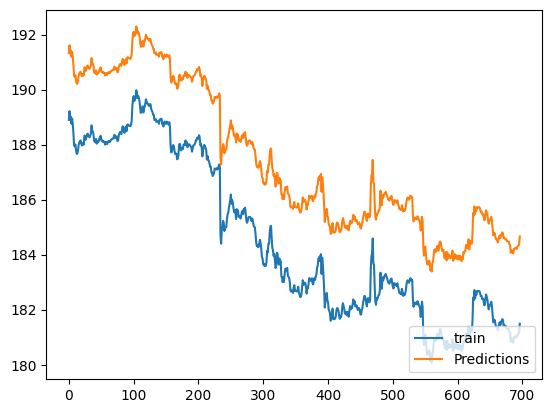

[[1.55758015 1.45157007 1.53819475 ... 3.19469164 3.18135945 3.13624685]
 [1.64716887 1.54730897 1.62885004 ... 3.23931537 3.22616759 3.18169038]
 [1.57482444 1.47005843 1.55565395 ... 3.20313453 3.18983763 3.14484665]
 ...
 [2.13914182 2.21244841 2.15312344 ... 1.78999191 1.76608729 1.68346686]
 [2.12118367 2.19509007 2.13528288 ... 1.81123676 1.78761626 1.70603876]
 [2.05983493 2.1358652  2.07435116 ... 1.88071233 1.85797528 1.77962594]]


In [113]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [119]:
error = np.mean(error_main, axis=1)
error

array([2.52722417, 2.58744228, 2.5387034 , 2.54980281, 2.50016425,
       2.5367952 , 2.49918636, 2.43203615, 2.34092973, 2.33126232,
       2.34709328, 2.30036742, 2.27185094, 2.27185094, 2.29682585,
       2.34170537, 2.36205055, 2.3694697 , 2.37790593, 2.35610581,
       2.33846812, 2.34275836, 2.35886101, 2.34601449, 2.41424826,
       2.41013751, 2.38315022, 2.40085139, 2.42459537, 2.42854423,
       2.41321811, 2.40558198, 2.40142685, 2.41527077, 2.43158889,
       2.48843311, 2.44774161, 2.44498673, 2.42035246, 2.3715834 ,
       2.37207018, 2.36311693, 2.38942298, 2.35245271, 2.36840809,
       2.36362102, 2.3715834 , 2.39359014, 2.39359014, 2.41342698,
       2.37896057, 2.37896057, 2.36840809, 2.3747517 , 2.36735287,
       2.3614738 , 2.34497863, 2.36629687, 2.36205055, 2.34923375,
       2.36523289, 2.3726355 , 2.37289304, 2.36491641, 2.3726355 ,
       2.38312891, 2.3852441 , 2.39150095, 2.39254591, 2.39150095,
       2.41936796, 2.41629955, 2.40106195, 2.39379466, 2.40807

In [121]:
print(np.mean(error))

1.903937551120119


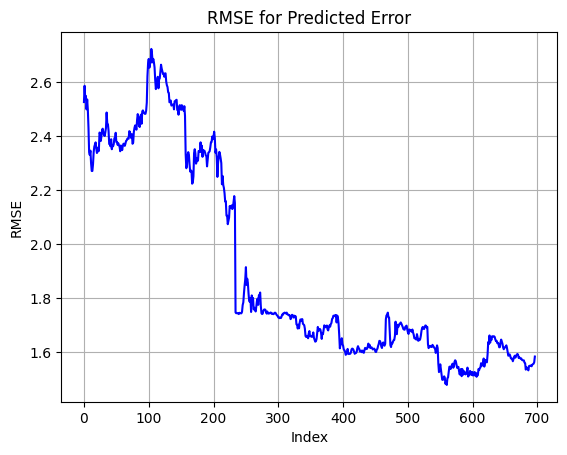

In [120]:
plt.plot(np.arange(697), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [116]:
final_pred

array([191.3260498 , 191.61315918, 191.38006592, 191.43261719,
       191.20007324, 191.37106323, 191.19555664, 190.89154053,
       190.49932861, 190.45916748, 190.52508545, 190.33282471,
       190.21905518, 190.21905518, 190.31854248, 190.50256348,
       190.58807373, 190.61956787, 190.65557861, 190.56295776,
       190.48907471, 190.50695801, 190.57458496, 190.52056885,
       190.81307983, 190.79507446, 190.67807007, 190.75457764,
       190.85861206, 190.87606812, 190.80856323, 190.775177  ,
       190.75708008, 190.81756592, 190.88955688, 191.14605713,
       190.96154785, 190.94921875, 190.83990479, 190.62857056,
       190.63064575, 190.59259033, 190.70507812, 190.5475769 ,
       190.61505127, 190.59472656, 190.62857056, 190.7230835 ,
       190.7230835 , 190.80947876, 190.66009521, 190.66009521,
       190.61505127, 190.64208984, 190.61056519, 190.58563232,
       190.51623535, 190.6060791 , 190.58807373, 190.53405762,
       190.6015625 , 190.63305664, 190.63415527, 190.60